# 03_Visualization.ipynb
### Purpose
- Visualize the stock price data in a user-friendly way.
- Plot real-time stock price trends and moving averages.

In [ ]:
# Import necessary libraries
from kafka import KafkaConsumer
import json
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import time

# Kafka configuration
KAFKA_BROKER = "localhost:9092"  # Replace with your Kafka broker's address
TOPIC_NAME = "stock_prices"

# Initialize Kafka Consumer
consumer = KafkaConsumer(
    TOPIC_NAME,
    bootstrap_servers=KAFKA_BROKER,
    auto_offset_reset="earliest",
    value_deserializer=lambda x: json.loads(x.decode("utf-8"))
)

# Create a DataFrame to store the data
columns = ["timestamp", "symbol", "open", "high", "low", "close", "volume"]
data = pd.DataFrame(columns=columns)

# Moving average window size (e.g., 5 minutes)
MOVING_AVG_WINDOW = 5

# Function to calculate moving average
def calculate_moving_average(df, column, window):
    df[f"{column}_moving_avg"] = df[column].rolling(window=window).mean()

# Function to plot stock data
def plot_stock_data(df):
    plt.figure(figsize=(10, 6))
    
    # Plot stock closing price and moving average
    plt.plot(df["timestamp"], df["close"], label="Close Price", color="blue", marker="o", linestyle='-', markersize=5)
    plt.plot(df["timestamp"], df["close_moving_avg"], label="Moving Average", color="red", linestyle='--')
    
    plt.xlabel("Timestamp")
    plt.ylabel("Price (USD)")
    plt.title("Stock Price and Moving Average")
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Process and transform the data
print("Starting data visualization...")
for message in consumer:
    # Get the stock data from Kafka
    stock_data = message.value
    print(f"Consumed message: {stock_data}")
    
    # Prepare the new row to add to the DataFrame
    row = {
        "timestamp": datetime.strptime(stock_data["timestamp"], "%Y-%m-%d %H:%M:%S"),
        "symbol": stock_data["symbol"],
        "open": float(stock_data["open"]),
        "high": float(stock_data["high"]),
        "low": float(stock_data["low"]),
        "close": float(stock_data["close"]),
        "volume": int(stock_data["volume"]),
    }
    
    # Append the data to the DataFrame using pd.concat (to avoid duplicates)
    if row not in data.to_dict("records"):
        data = pd.concat([data, pd.DataFrame([row])], ignore_index=True)
    
    # Calculate moving averages
    calculate_moving_average(data, "close", MOVING_AVG_WINDOW)
    
    # Print the first few records for debugging
    print(f"First few records in DataFrame:\n{data.head()}")
    
    # Plot the stock data
    print(f"Plotting {len(data)} records.")
    plot_stock_data(data)
    
    # Wait before consuming the next message
    time.sleep(1)  # Adjust the sleep time as needed


In [ ]:
# Import necessary libraries
from kafka import KafkaConsumer
import json
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import time

# Kafka configuration
KAFKA_BROKER = "localhost:9092"  # Replace with your Kafka broker's address
TOPIC_NAME = "stock_prices"

# Initialize Kafka Consumer
consumer = KafkaConsumer(
    TOPIC_NAME,
    bootstrap_servers=KAFKA_BROKER,
    auto_offset_reset="earliest",
    value_deserializer=lambda x: json.loads(x.decode("utf-8"))
)

# Create a DataFrame to store the data
columns = ["timestamp", "symbol", "open", "high", "low", "close", "volume"]
data = pd.DataFrame(columns=columns)

# Moving average window size (e.g., 5 minutes)
MOVING_AVG_WINDOW = 5

# Function to calculate moving average
def calculate_moving_average(df, column, window):
    df[f"{column}_moving_avg"] = df[column].rolling(window=window).mean()

# Function to plot stock data
def plot_stock_data(df):
    plt.figure(figsize=(10, 6))
    
    # Plot stock closing price and moving average
    plt.plot(df["timestamp"], df["close"], label="Close Price", color="blue", marker="o", linestyle='-', markersize=5)
    plt.plot(df["timestamp"], df["close_moving_avg"], label="Moving Average", color="red", linestyle='--')
    
    plt.xlabel("Timestamp")
    plt.ylabel("Price (USD)")
    plt.title("Stock Price and Moving Average")
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Process and transform the data
print("Starting data visualization...")
for message in consumer:
    # Get the stock data from Kafka
    stock_data = message.value
    print(f"Consumed message: {stock_data}")
    
    # Prepare the new row to add to the DataFrame
    row = {
        "timestamp": datetime.strptime(stock_data["timestamp"], "%Y-%m-%d %H:%M:%S"),
        "symbol": stock_data["symbol"],
        "open": float(stock_data["open"]),
        "high": float(stock_data["high"]),
        "low": float(stock_data["low"]),
        "close": float(stock_data["close"]),
        "volume": int(stock_data["volume"]),
    }
    
    # Append the data to the DataFrame using pd.concat (to avoid duplicates)
    if row not in data.to_dict("records"):
        data = pd.concat([data, pd.DataFrame([row])], ignore_index=True)
    
    # Calculate moving averages (only if we have enough data points)
    if len(data) >= MOVING_AVG_WINDOW:
        calculate_moving_average(data, "close", MOVING_AVG_WINDOW)
    
    # Print the first few records for debugging
    print(f"First few records in DataFrame:\n{data.head()}")
    
    # Plot the stock data (only if we have enough data points)
    if len(data) >= MOVING_AVG_WINDOW:
        print(f"Plotting {len(data)} records.")
        plot_stock_data(data)
    
    # Wait before consuming the next message
    time.sleep(1)  # Adjust the sleep time as needed


Starting data visualization...
Consumed message: {'symbol': 'AAPL', 'timestamp': '2024-12-11 18:20:00', 'open': '246.7300', 'high': '246.8200', 'low': '246.7000', 'close': '246.7200', 'volume': '1631'}
First few records in DataFrame:
            timestamp symbol    open    high    low   close volume
0 2024-12-11 18:20:00   AAPL  246.73  246.82  246.7  246.72   1631


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22488\1672259520.py:68: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, pd.DataFrame([row])], ignore_index=True)


Consumed message: {'symbol': 'AAPL', 'timestamp': '2024-12-11 18:20:00', 'open': '246.7300', 'high': '246.8200', 'low': '246.7000', 'close': '246.7200', 'volume': '1631'}
First few records in DataFrame:
            timestamp symbol    open    high    low   close volume
0 2024-12-11 18:20:00   AAPL  246.73  246.82  246.7  246.72   1631
Consumed message: {'symbol': 'AAPL', 'timestamp': '2024-12-11 18:20:00', 'open': '246.7300', 'high': '246.8200', 'low': '246.7000', 'close': '246.7200', 'volume': '1631'}
First few records in DataFrame:
            timestamp symbol    open    high    low   close volume
0 2024-12-11 18:20:00   AAPL  246.73  246.82  246.7  246.72   1631
Consumed message: {'symbol': 'AAPL', 'timestamp': '2024-12-11 18:20:00', 'open': '246.7300', 'high': '246.8200', 'low': '246.7000', 'close': '246.7200', 'volume': '1631'}
First few records in DataFrame:
            timestamp symbol    open    high    low   close volume
0 2024-12-11 18:20:00   AAPL  246.73  246.82  246.7  246

In [ ]:
from kafka import KafkaConsumer
import pandas as pd
import json
import logging

# Setup logging
logging.basicConfig(level=logging.INFO)

# Kafka setup
topic = 'stock_prices'  # The Kafka topic to consume messages from
bootstrap_servers = ['localhost:9092']  # Kafka server addresses
consumer = KafkaConsumer(
    topic,
    bootstrap_servers=bootstrap_servers,
    group_id='stock-price-group',  # Consumer group
    auto_offset_reset='earliest',  # Start consuming from the earliest message
    value_deserializer=lambda m: json.loads(m.decode('utf-8'))  # Deserialize JSON messages
)

# Initialize an empty DataFrame to store the stock prices
columns = ['timestamp', 'symbol', 'open', 'high', 'low', 'close', 'volume']
df = pd.DataFrame(columns=columns)

# Function to append data to DataFrame
def append_to_df(message, df):
    # Parse the consumed message
    data = {
        'timestamp': message['timestamp'],
        'symbol': message['symbol'],
        'open': float(message['open']),
        'high': float(message['high']),
        'low': float(message['low']),
        'close': float(message['close']),
        'volume': int(message['volume'])
    }
    
    # Append the new data to the DataFrame
    df = df.append(data, ignore_index=True)
    
    # Log the new state of the DataFrame
    logging.info(f"First few records in DataFrame:\n{df.head()}")
    
    return df

# Consume and process messages from Kafka
for message in consumer:
    # Parse message and append to DataFrame
    msg_value = message.value
    logging.info(f"Consumed message: {msg_value}")
    
    # Update the DataFrame with new stock data
    df = append_to_df(msg_value, df)
    
    # Optional: Save the DataFrame to a CSV or database periodically or based on specific conditions
    # df.to_csv('stock_data.csv', index=False)

# Close the Kafka consumer when done
consumer.close()


Plotting 4 records.


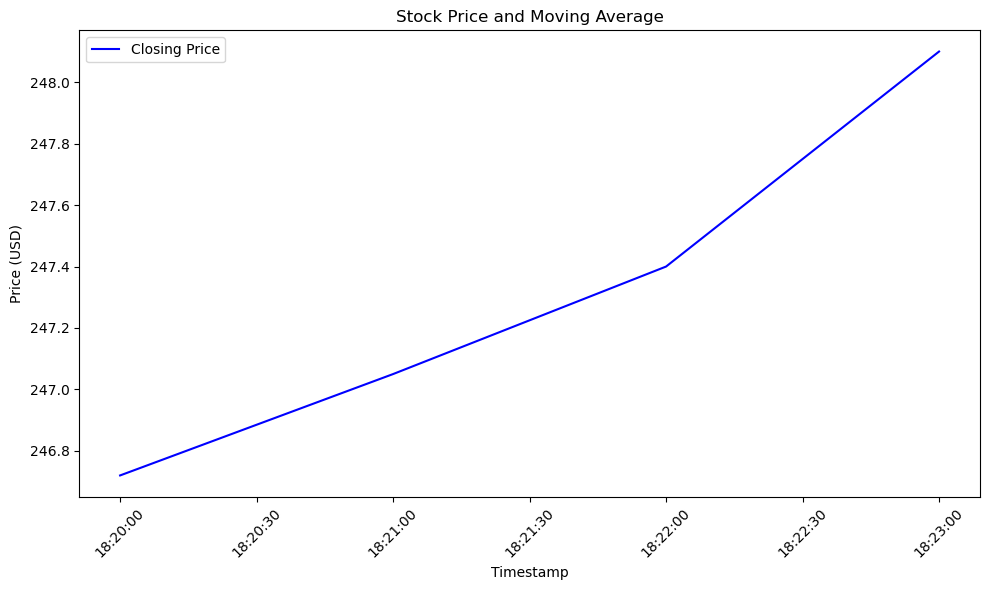

In [1]:
# 03_Visualization.ipynb

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Create a static DataFrame with sample data
data = pd.DataFrame({
    'timestamp': ['2024-12-11 18:20:00', '2024-12-11 18:21:00', '2024-12-11 18:22:00', '2024-12-11 18:23:00'],
    'symbol': ['AAPL', 'AAPL', 'AAPL', 'AAPL'],
    'open': [246.73, 247.00, 247.50, 248.00],
    'high': [246.82, 247.10, 247.60, 248.20],
    'low': [246.70, 246.90, 247.30, 247.80],
    'close': [246.72, 247.05, 247.40, 248.10],
    'volume': [1631, 1800, 1700, 1600]
})

# Convert 'timestamp' to datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Function to calculate moving average
def calculate_moving_average(df, column, window):
    df[f"{column}_moving_avg"] = df[column].rolling(window=window).mean()

# Function to plot stock data
def plot_stock_data(df):
    if df.empty:
        print("Dataframe is empty. Skipping plot.")
        return

    print(f"Plotting {len(df)} records.")
    
    # Plot the closing price
    plt.figure(figsize=(10, 6))
    plt.plot(df['timestamp'], df['close'], label="Closing Price", color="blue")

    # Plot the moving average only if there are enough data points
    if len(df) >= 5:  # Ensure we have enough data for the moving average
        calculate_moving_average(df, 'close', 5)
        plt.plot(df['timestamp'], df['close_moving_avg'], label="Moving Average", color="orange")

    # Set labels and title
    plt.xlabel("Timestamp")
    plt.ylabel("Price (USD)")
    plt.title("Stock Price and Moving Average")
    plt.xticks(rotation=45)
    plt.legend()

    # Display the plot
    plt.tight_layout()
    plt.show()

# Test the plot function with static data
plot_stock_data(data)


Plotting 5 records.


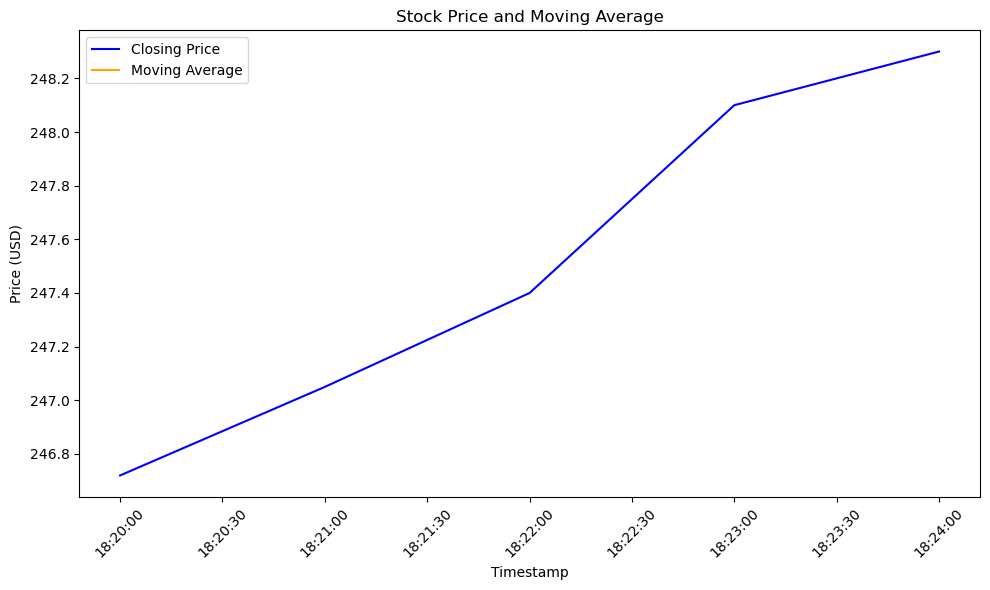

In [3]:
# 03_Visualization.ipynb

# Create a static DataFrame with more sample data for testing moving average
data = pd.DataFrame({
    'timestamp': ['2024-12-11 18:20:00', '2024-12-11 18:21:00', '2024-12-11 18:22:00', '2024-12-11 18:23:00', '2024-12-11 18:24:00'],
    'symbol': ['AAPL', 'AAPL', 'AAPL', 'AAPL', 'AAPL'],
    'open': [246.73, 247.00, 247.50, 248.00, 248.20],
    'high': [246.82, 247.10, 247.60, 248.20, 248.50],
    'low': [246.70, 246.90, 247.30, 247.80, 248.00],
    'close': [246.72, 247.05, 247.40, 248.10, 248.30],
    'volume': [1631, 1800, 1700, 1600, 1550]
})

# Convert 'timestamp' to datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Function to calculate moving average
def calculate_moving_average(df, column, window):
    df[f"{column}_moving_avg"] = df[column].rolling(window=window).mean()

# Function to plot stock data
def plot_stock_data(df):
    if df.empty:
        print("Dataframe is empty. Skipping plot.")
        return

    print(f"Plotting {len(df)} records.")
    
    # Plot the closing price
    plt.figure(figsize=(10, 6))
    plt.plot(df['timestamp'], df['close'], label="Closing Price", color="blue")

    # Plot the moving average only if there are enough data points
    if len(df) >= 5:  # Ensure we have enough data for the moving average
        calculate_moving_average(df, 'close', 5)
        plt.plot(df['timestamp'], df['close_moving_avg'], label="Moving Average", color="orange")

    # Set labels and title
    plt.xlabel("Timestamp")
    plt.ylabel("Price (USD)")
    plt.title("Stock Price and Moving Average")
    plt.xticks(rotation=45)
    plt.legend()

    # Display the plot
    plt.tight_layout()
    plt.show()

# Test the plot function with more static data
plot_stock_data(data)


Plotting 5 records.


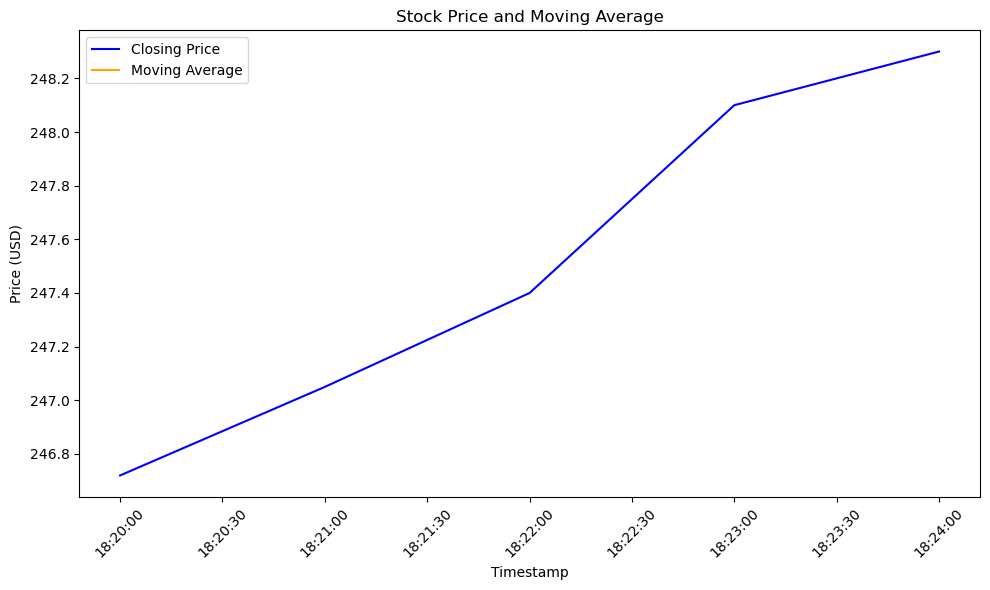

In [6]:
# 03_Visualization.ipynb

import matplotlib.pyplot as plt
import pandas as pd

# Create a static DataFrame with more sample data for testing moving average
data = pd.DataFrame({
    'timestamp': ['2024-12-11 18:20:00', '2024-12-11 18:21:00', '2024-12-11 18:22:00', '2024-12-11 18:23:00', '2024-12-11 18:24:00'],
    'symbol': ['AAPL', 'AAPL', 'AAPL', 'AAPL', 'AAPL'],
    'open': [246.73, 247.00, 247.50, 248.00, 248.20],
    'high': [246.82, 247.10, 247.60, 248.20, 248.50],
    'low': [246.70, 246.90, 247.30, 247.80, 248.00],
    'close': [246.72, 247.05, 247.40, 248.10, 248.30],
    'volume': [1631, 1800, 1700, 1600, 1550]
})

# Convert 'timestamp' to datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Function to calculate moving average
def calculate_moving_average(df, column, window):
    df[f"{column}_moving_avg"] = df[column].rolling(window=window).mean()

# Function to plot stock data
def plot_stock_data(df):
    if df.empty:
        print("Dataframe is empty. Skipping plot.")
        return

    print(f"Plotting {len(df)} records.")
    
    # Calculate the moving average after data has been loaded
    calculate_moving_average(df, 'close', 5)  # Adjust window as needed

    # Plot the closing price
    plt.figure(figsize=(10, 6))
    plt.plot(df['timestamp'], df['close'], label="Closing Price", color="blue")

    # Plot the moving average if there are valid values
    if df['close_moving_avg'].notna().any():
        plt.plot(df['timestamp'], df['close_moving_avg'], label="Moving Average", color="orange")

    # Set labels and title
    plt.xlabel("Timestamp")
    plt.ylabel("Price (USD)")
    plt.title("Stock Price and Moving Average")
    plt.xticks(rotation=45)
    plt.legend()

    # Display the plot
    plt.tight_layout()
    plt.show()

# Test the plot function with more static data
plot_stock_data(data)


Plotting 10 records.
First few records with moving average:
            timestamp   close  close_moving_avg
0 2024-12-11 18:20:00  246.72               NaN
1 2024-12-11 18:21:00  247.05               NaN
2 2024-12-11 18:22:00  247.40               NaN
3 2024-12-11 18:23:00  248.10               NaN
4 2024-12-11 18:24:00  248.30           247.514


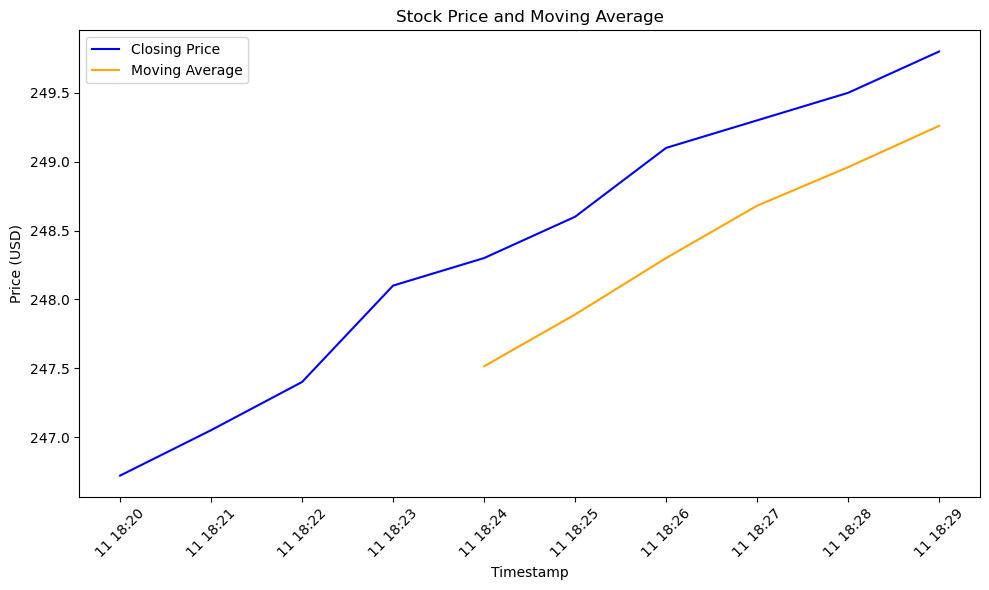

In [9]:
# 03_Visualization.ipynb

import matplotlib.pyplot as plt
import pandas as pd

# Sample data with more points to compute moving average
data = pd.DataFrame({
    'timestamp': [
        '2024-12-11 18:20:00', '2024-12-11 18:21:00', '2024-12-11 18:22:00', '2024-12-11 18:23:00', '2024-12-11 18:24:00',
        '2024-12-11 18:25:00', '2024-12-11 18:26:00', '2024-12-11 18:27:00', '2024-12-11 18:28:00', '2024-12-11 18:29:00'
    ],
    'symbol': ['AAPL'] * 10,
    'open': [246.73, 247.00, 247.50, 248.00, 248.20, 248.50, 248.80, 249.00, 249.20, 249.50],
    'high': [246.82, 247.10, 247.60, 248.20, 248.50, 248.90, 249.20, 249.50, 249.70, 249.90],
    'low': [246.70, 246.90, 247.30, 247.80, 248.00, 248.20, 248.50, 248.80, 249.00, 249.10],
    'close': [246.72, 247.05, 247.40, 248.10, 248.30, 248.60, 249.10, 249.30, 249.50, 249.80],
    'volume': [1631, 1800, 1700, 1600, 1550, 1650, 1600, 1580, 1700, 1650]
})

# Convert 'timestamp' to datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Function to calculate moving average
def calculate_moving_average(df, column, window):
    df[f"{column}_moving_avg"] = df[column].rolling(window=window).mean()

# Function to plot stock data
def plot_stock_data(df):
    if df.empty:
        print("Dataframe is empty. Skipping plot.")
        return

    print(f"Plotting {len(df)} records.")

    # Calculate the moving average after data has been loaded
    calculate_moving_average(df, 'close', 5)  # Adjust window as needed

    # Debugging: Check if moving average column has been computed
    print(f"First few records with moving average:\n{df[['timestamp', 'close', 'close_moving_avg']].head()}")

    # Plot the closing price
    plt.figure(figsize=(10, 6))
    plt.plot(df['timestamp'], df['close'], label="Closing Price", color="blue")

    # Plot the moving average if there are valid values
    if df['close_moving_avg'].notna().any():
        plt.plot(df['timestamp'], df['close_moving_avg'], label="Moving Average", color="orange")

    # Set labels and title
    plt.xlabel("Timestamp")
    plt.ylabel("Price (USD)")
    plt.title("Stock Price and Moving Average")
    plt.xticks(rotation=45)
    plt.legend()

    # Display the plot
    plt.tight_layout()
    plt.show()

# Test the plot function with more data points
plot_stock_data(data)
